In [9]:
import matplotlib.pyplot as plt
import numpy as np
from vis_creator import  VisCal, VisTrue


In [10]:
vc = VisCal("/data/scratch/apw737/catall_nobright/viscatBC")
vc.remove_redundancy()
print("redcal rms", vc.get_rms())
vt = VisTrue("/data/scratch/apw737/catall_nobright/viscatBC")
print("true sim rms", vt.get_rms())

Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_g.uvh5
Get model from /data/scratch/apw737/catall_nobright/viscatBC_g_cal_dict.npz


Telescope hera_sim is not in known_telescopes.
Telescope hera_sim is not in known_telescopes.


Get noise from /data/scratch/apw737/catall_nobright/viscatBC_nn.npz
redcal rms 0.3685085419537122
Get true model from /data/scratch/apw737/catall_nobright/viscatBC.uvh5
Get true gains from /data/scratch/apw737/catall_nobright/viscatBC.calfits
Get V_obs from /data/scratch/apw737/catall_nobright/viscatBC_g.uvh5


Telescope hera_sim is not in known_telescopes.
telescope_location is not set. Using known values for HERA.
antenna_positions is not set. Using known values for HERA.
Telescope hera_sim is not in known_telescopes.


true sim rms 0.2576325631287173


### Plot the redcal g and V. 

Because redundant baselines exist, the V values are the V for redundant baseline groups

Plot the amplitudes then phases.

Plot g amp


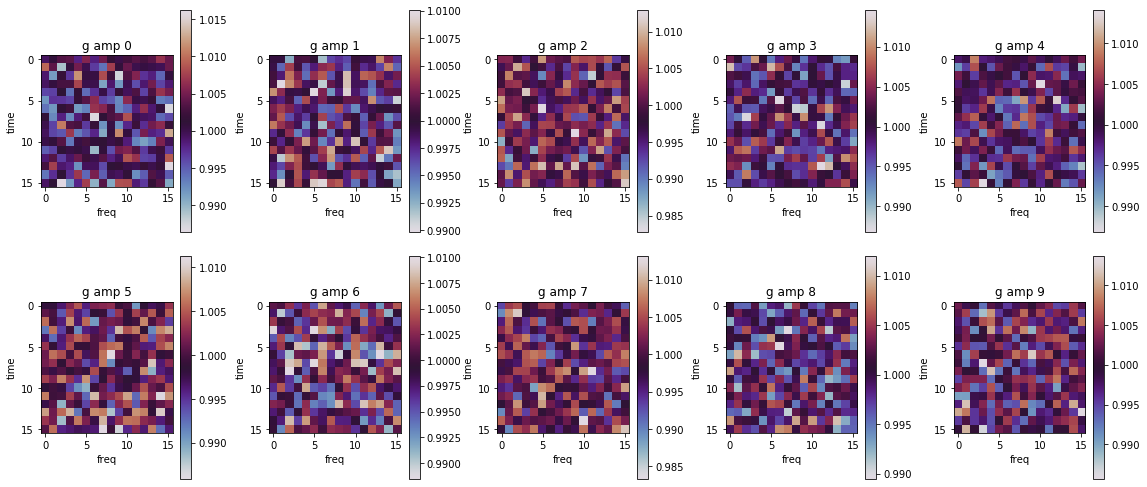

In [11]:
plt.rcParams['figure.figsize'] = [16, 7]
vc.plot_data("g", 5, "amp")

Plot g phase


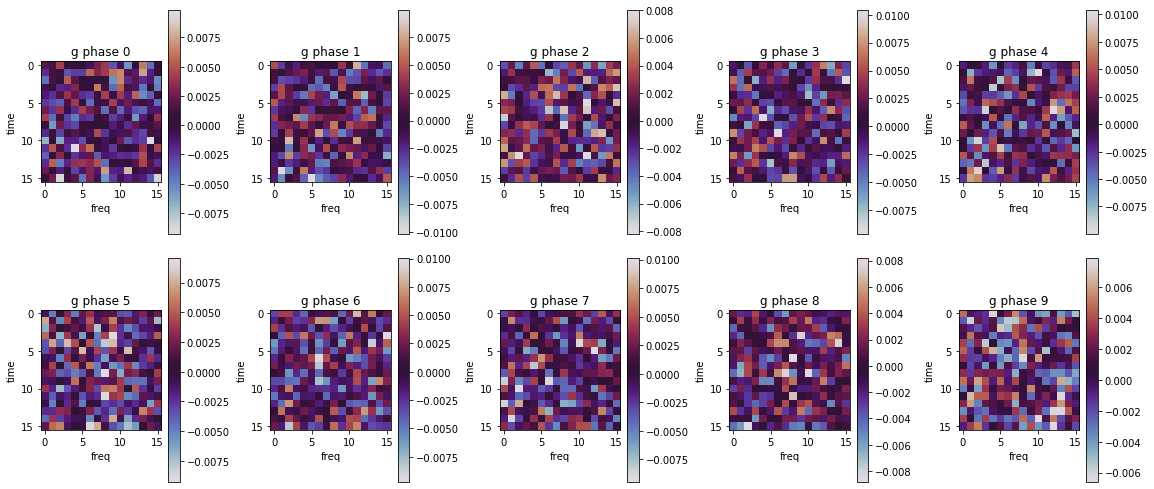

In [12]:
plt.rcParams['figure.figsize'] = [16, 7]
vc.plot_data("g", 5, "phase")

Plot V amp


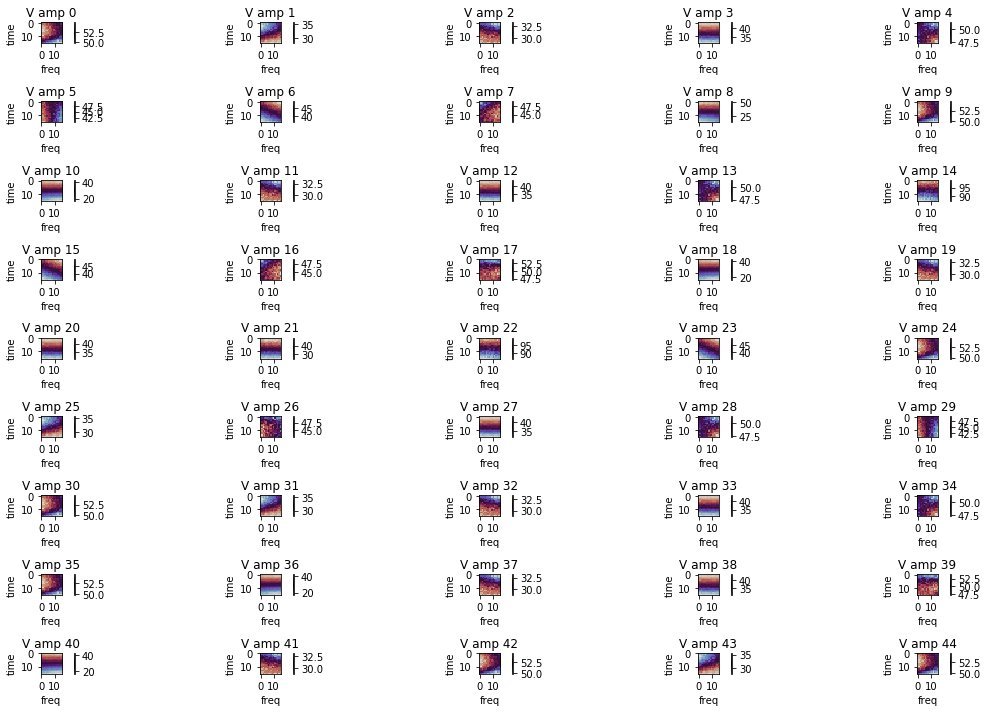

In [13]:
plt.rcParams['figure.figsize'] = [16, 10]
vc.plot_data("V", 5, "amp")
    

Plot V phase


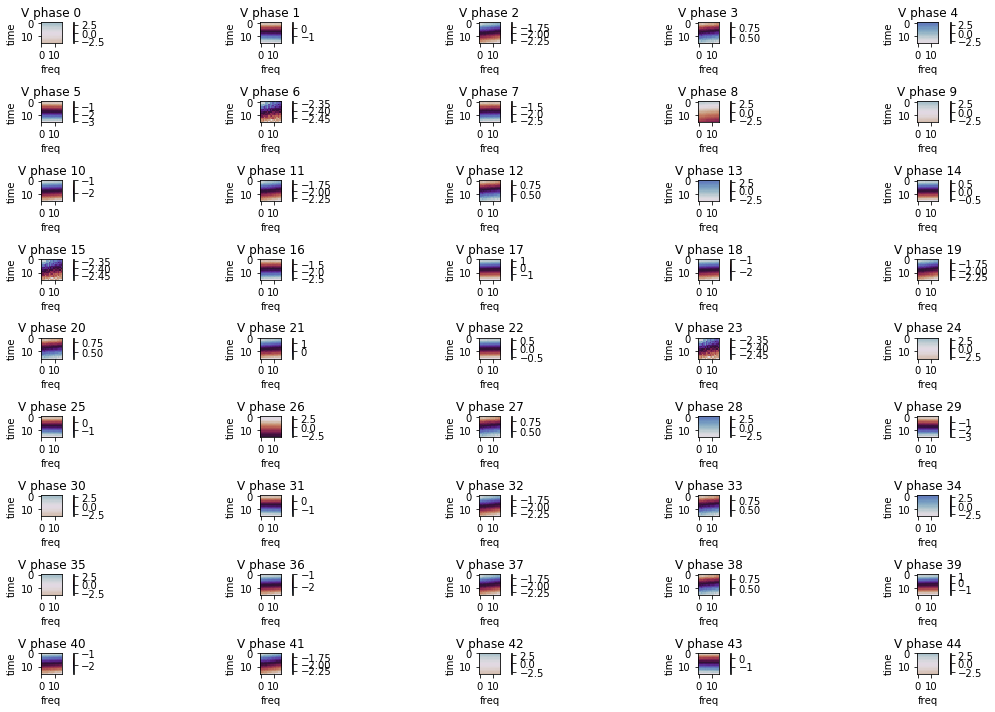

In [14]:
vc.plot_data("V", 5, "phase")

### Plot the simulated (true) g and V. 

There are no redundant groups. They could be grouped as determind by redcal, but the Vs won't be identical for all baselines in a group.

Plot the amplitudes then phases.

Plot g amp


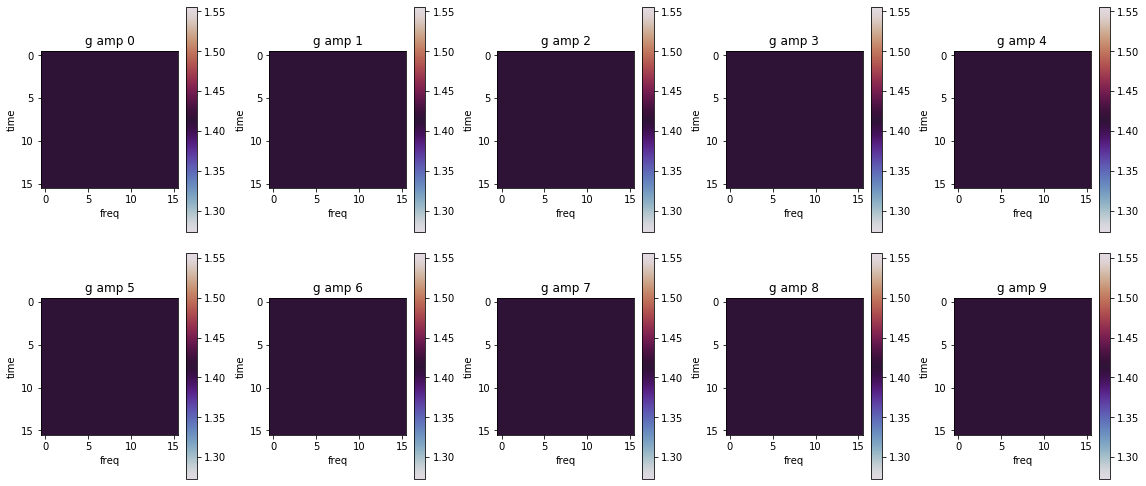

In [15]:
plt.rcParams['figure.figsize'] = [16, 7]
vt.plot_data("g", 5, "amp")

Plot g phase


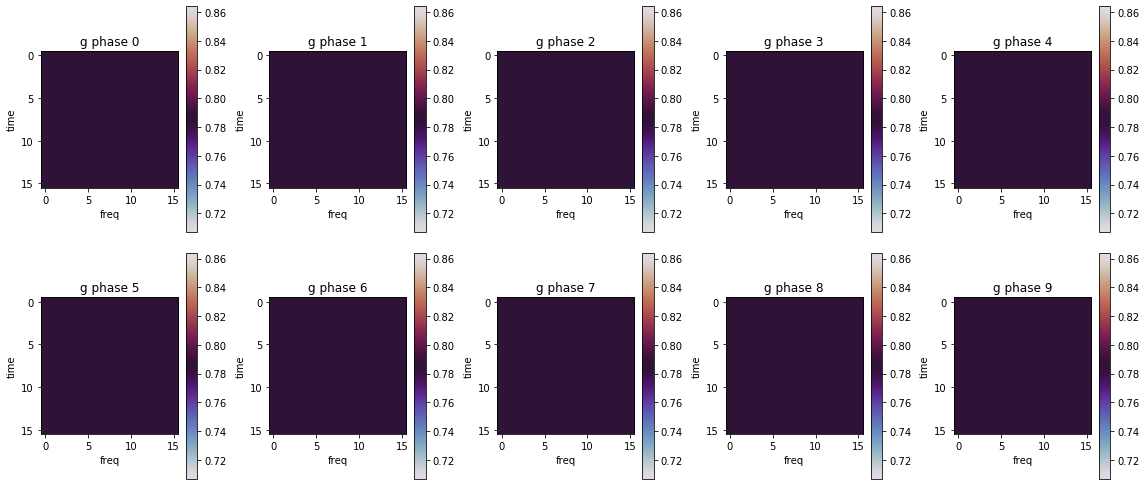

In [16]:
plt.rcParams['figure.figsize'] = [16, 7]
vt.plot_data("g", 5, "phase")

Plot V amp


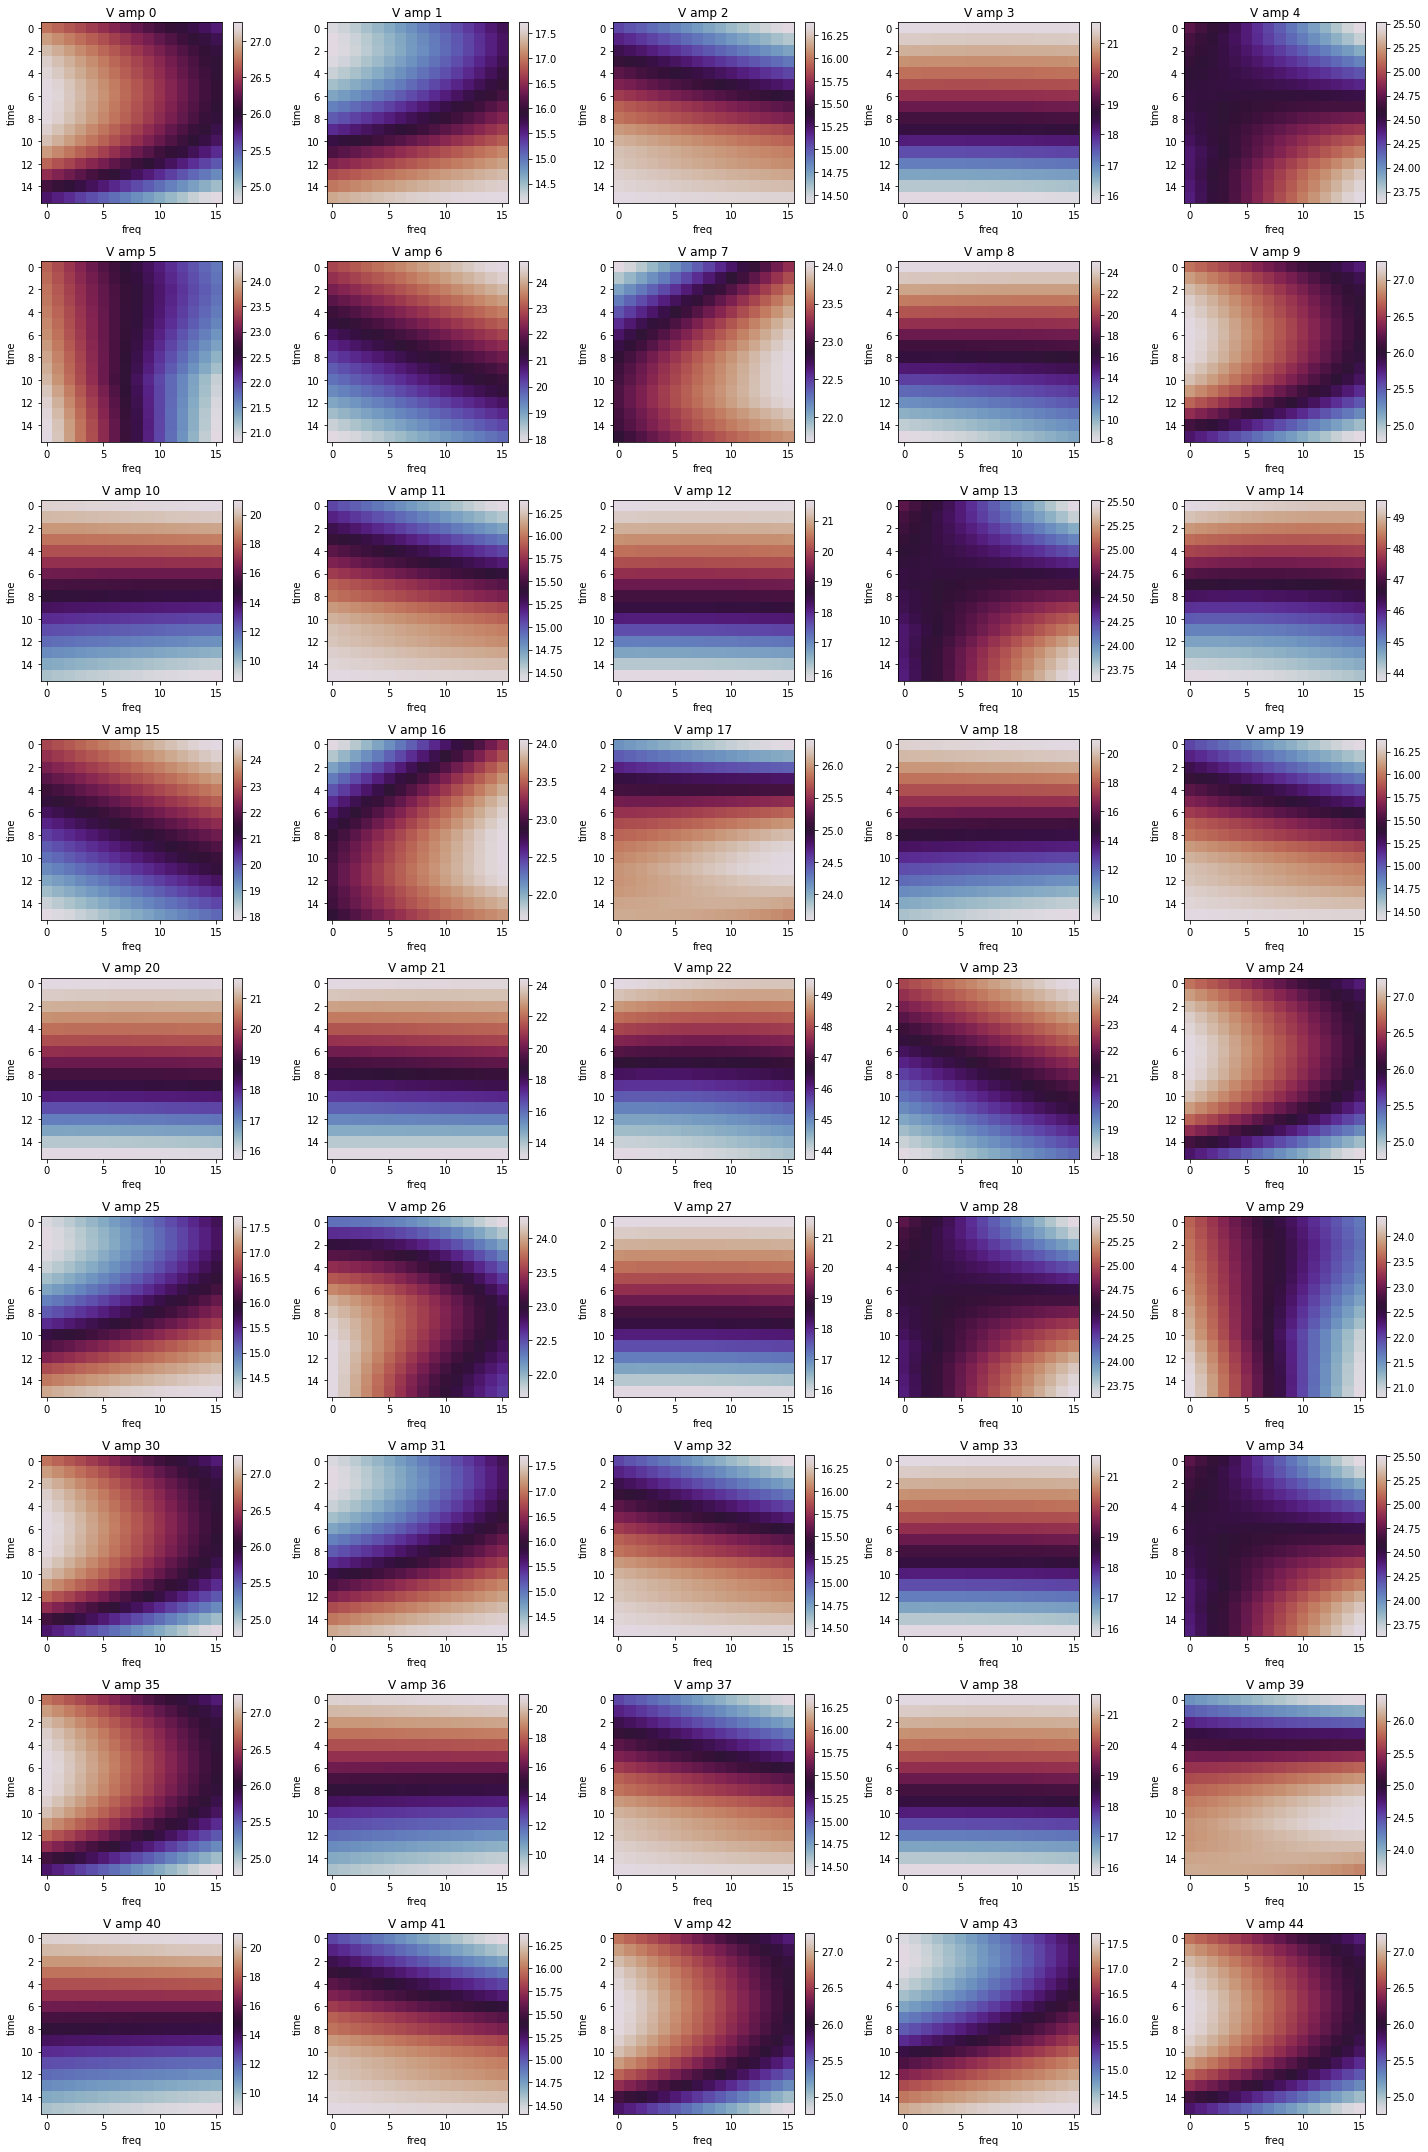

In [17]:
plt.rcParams['figure.figsize'] = [20, 30]
vt.plot_data("V", 5, "amp")

Plot V phase


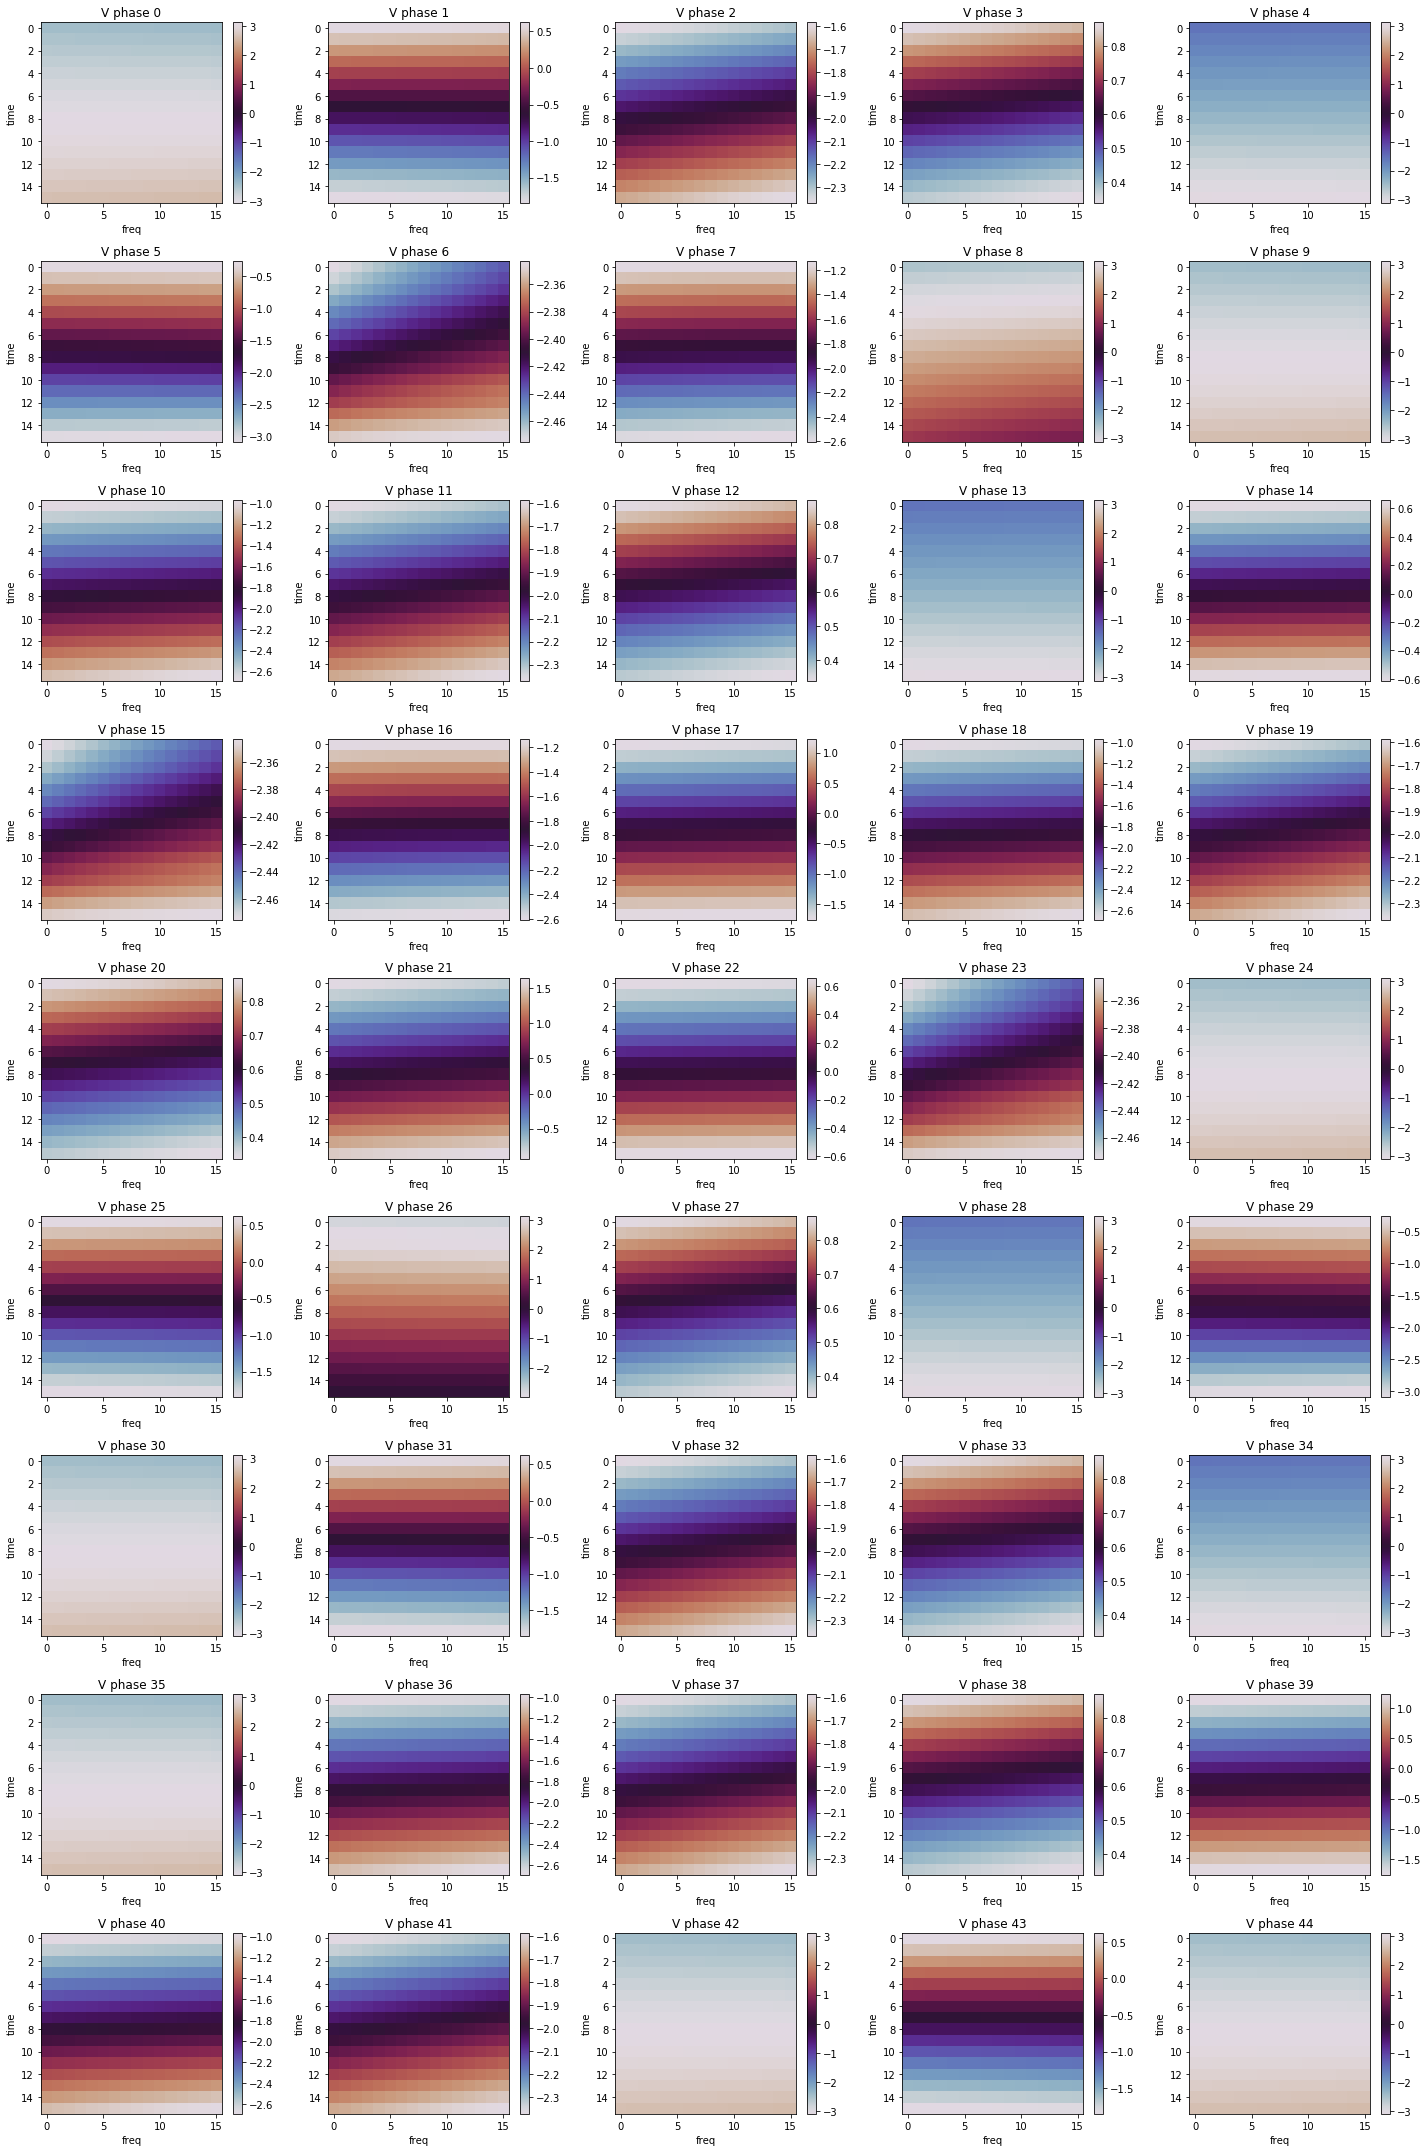

In [18]:
plt.rcParams['figure.figsize'] = [20, 30]
vt.plot_data("V", 5, "phase")

### Compare d with s, from redcal

redcal abs(d), abs(s) limited to the first few values


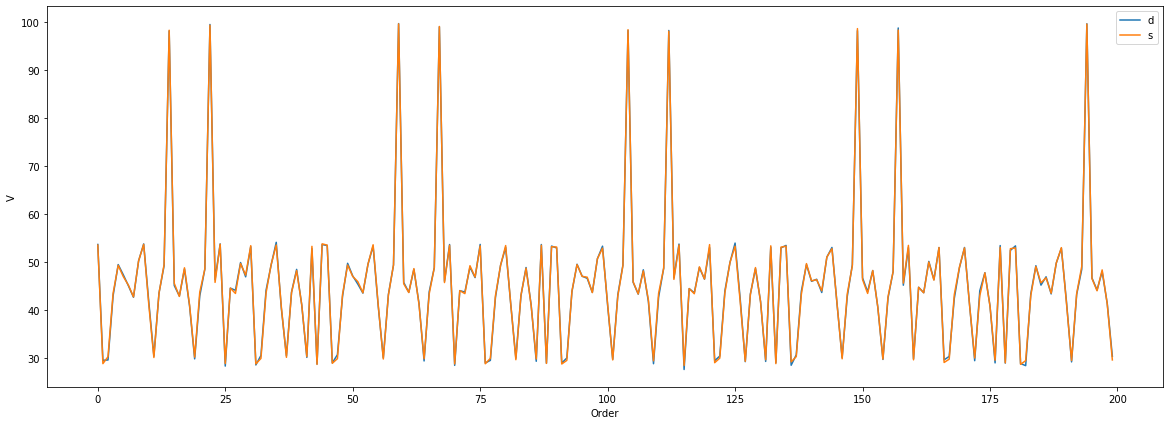

In [19]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.abs(vc.V_obs))[:limit_to], label="d")
plt.plot(np.abs(np.ravel(vc.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("redcal abs(d), abs(s) limited to the first few values")

redcal phase(d), phase(s) limited to the first few values


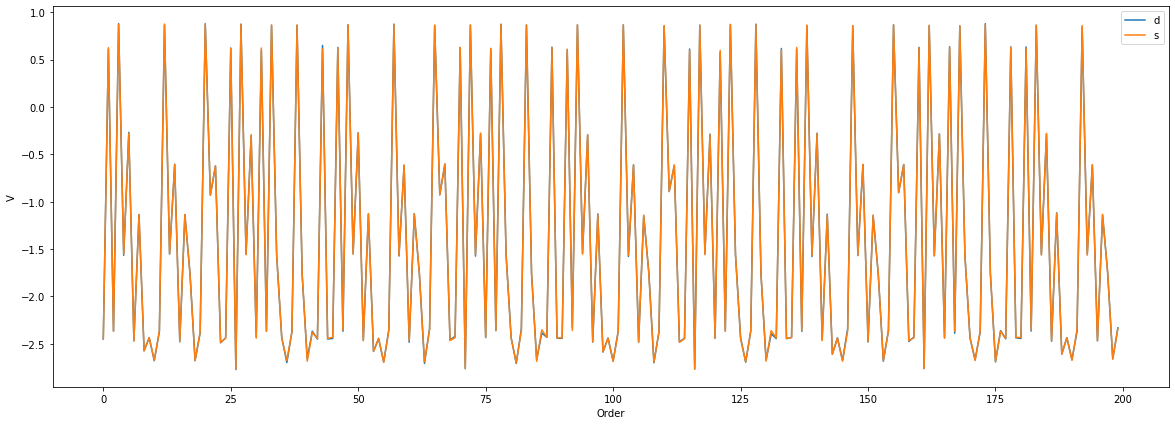

In [20]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.angle(vc.V_obs))[:limit_to], label="d")
plt.plot(np.angle(np.ravel(vc.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("redcal phase(d), phase(s) limited to the first few values")

### Compare d with s, from sim (called true)

sim abs(d), abs(s) limited to the first few values


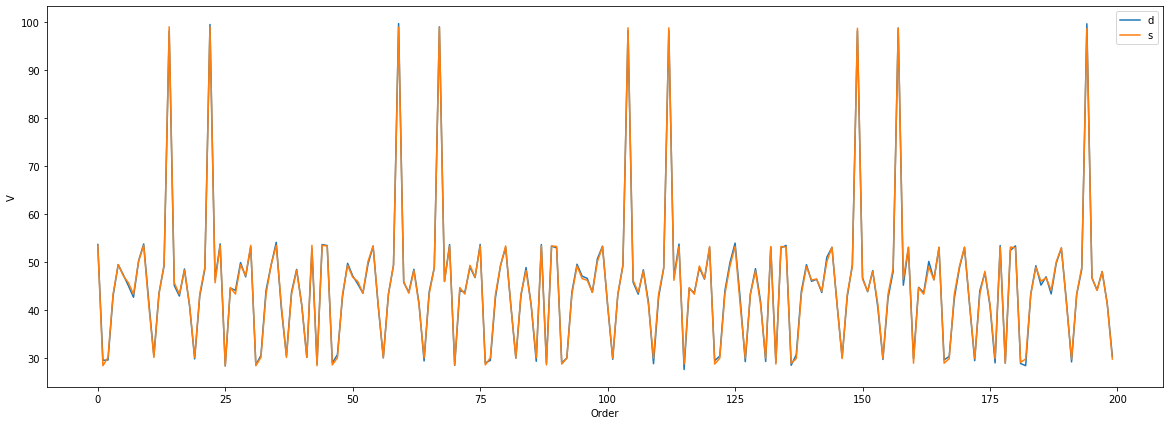

In [21]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.abs(vt.V_obs))[:limit_to], label="d")
plt.plot(np.abs(np.ravel(vt.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("sim abs(d), abs(s) limited to the first few values")

sim phase(d), phase(s) limited to the first few values


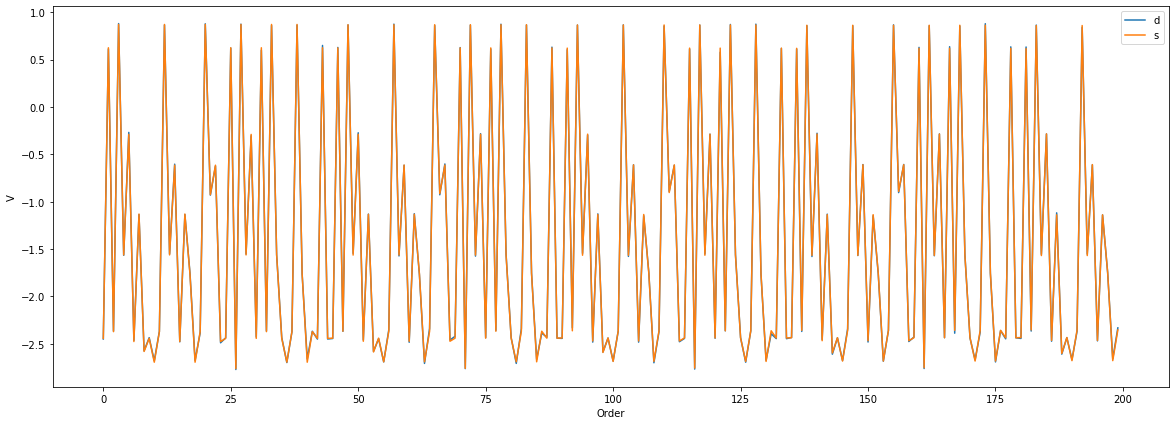

In [22]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(np.angle(vt.V_obs))[:limit_to], label="d")
plt.plot(np.angle(np.ravel(vt.get_simulated_visibilities()))[:limit_to], label="s")     # get_simulated visibilities does gg*V 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("sim phase(d), phase(s) limited to the first few values")

### Plot the weights and noise

The weights are used to calculate chi2. The noise is used to calculate the likelihood

weights, noise limited to the first few values


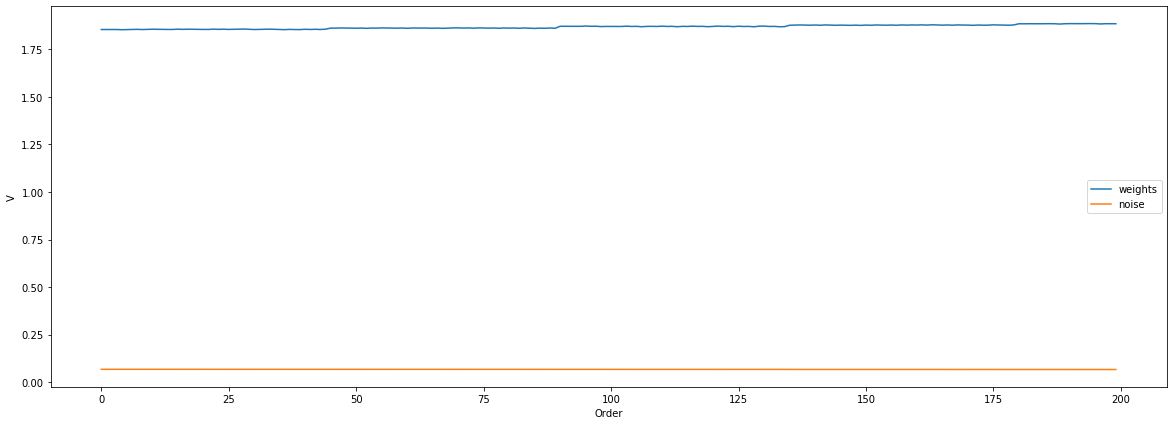

In [23]:
plt.rcParams['figure.figsize'] = [20, 7]
limit_to = 200
plt.plot(np.ravel(vc.weights)[:limit_to], label="weights")
plt.plot(np.ravel(vc.obs_variance.real)[:limit_to], label="noise")     # get_calibrated_visibilities does d/gg 
plt.xlabel("Order")
plt.ylabel("V")
plt.legend()
print("weights, noise limited to the first few values")